## Manuscript Plots

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.ticker as mtick

In [237]:
import os
import sys
nb_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.figsize'] = (6.0, 2.50)
mpl.rcParams['figure.dpi'] = 200

In [4]:
# image sizes
ONECOL = 3.42
THREEHALVESCOL = 4.5
TWOCOL = 7

## Barghi et al (2019) Combined Plots

In [206]:
barghi_gw_temp_covs_cis = np.load("../../data/barghi_et_al_2019/gw_temp_covs_cis.npy")
barghi_g_cis_averep = np.load("../../data/barghi_et_al_2019/g_cis_averep.npy")
barghi_g = np.load("../../data/barghi_et_al_2019/g.npy")

In [207]:
def cov_plot(cov_cis, ax=None, alpha=1, error_alpha=1, ngens=1, linewidth=1, ylim=None, xlim=None, hline=True, 
             cmap=cm.Set1, y_multiplier=None):
    if ax is None:
        fig, ax = plt.subplots()
    _, T, T = cov_cis.shape
    y_multiplier = y_multiplier if y_multiplier is not None else 1
    mid_T = (T-4)/2
    for refgen in range(T):
        x = 2*ngens + np.arange(refgen, T) * ngens - mid_T + refgen*0.6  # TODO a bit of a hack
        mean = y_multiplier*cov_cis[1][refgen, (refgen+1):]
        lower, upper = y_multiplier*cov_cis[0][refgen, (refgen+1):]-mean, mean-y_multiplier*cov_cis[2][refgen, (refgen+1):]
        
        #ax.plot(np.broadcast_to(ngens*np.arange(refgen, T), (2, T-refgen)), temp_covs_bs[(0, 2), refgen, refgen:])
        ax.plot(x[:-1], mean, '-o', linewidth=linewidth, solid_capstyle='round', alpha=alpha, c=cmap(refgen), 
                label=refgen, zorder=-refgen, markersize=0)

        ax.errorbar(x[:-1], mean, yerr=np.column_stack([lower.ravel(), upper.ravel()]).T, 
                    capsize=0, elinewidth=linewidth, c=cmap(refgen), 
                    linewidth=0,
                    zorder=refgen, alpha=error_alpha, label=None, solid_capstyle='round')

    if ylim is not None:
        plt.ylim(ylim)
    
    if xlim is not None:
        plt.xlim(xlim)
    #plt.xticks(np.arange(0, T*ngens, 10))
    plt.xticks(np.arange(0, 62, 10))
    if hline:
        ax.axhline(y=0, c='0.6', linewidth=0.5, zorder=-1e6, linestyle='--')
        
    ylab = "covariance"
    if y_multiplier is not None:
        ylab += f"  $(\\times 10^{{{int(np.log10(1/y_multiplier))}}})$"
        
#     ylab = "covariance "
#     if y_multiplier is not None:
#         ylab += "\n $\\mathrm{cov}(\\Delta p_s, \\Delta p_t)$"
#         ylab += f"  $ \\times 10^{{{int(np.log10(1/y_multiplier))}}}$"
#     add_latex = False
#     if add_latex:
#         ylab += "\n $\\mathrm{cov}(\\Delta p_s, \\Delta p_t)$"       
        
    ax.set_ylabel(ylab)
    #plt.legend(loc=(0.02, 0.75))

In [223]:
def G_plot(g, g_averep_cis=None, alpha=1, point_alpha=1, linewidth=1, ax=None, 
           ylim=None, xlim=None, as_percent=True, hline=True, cmap=None, ci_col='0.2',
           rep_markersize=0):
    if ax is None:
        fig, ax = plt.subplots()
    T, R = g.shape
    y_multiplier = 100. if as_percent else 1.
    x = np.arange(1, T+1) * 10
    cmap = cm.viridis if cmap is None else cmap
    cols = cmap(np.linspace(0, 1, T-1))
    for rep in range(R):
        for t in range(T-1):
            xa = x[t:(t+2)]
            mean = g[t:(t+2), rep]
            #import pdb; pdb.set_trace()
            ax.plot(xa, y_multiplier*mean, '-o', linewidth=linewidth, c=cols[t],
                    alpha=alpha, zorder=-t, markersize=rep_markersize, solid_capstyle='round')
            ax.plot(xa, y_multiplier*mean, 'o', linewidth=linewidth, c=cols[t],
                    alpha=point_alpha, zorder=-t, markersize=rep_markersize, solid_capstyle='round')
            
    if g_averep_cis is not None:
        mean = g_averep_cis[1, :]
        lower, upper = g_averep_cis[0, :]-mean, mean-g_averep_cis[2, :]
        ax.plot(x, y_multiplier*mean, '-', linewidth=linewidth, c=ci_col,
                zorder=np.Inf, markersize=0)
        ax.errorbar(x, y_multiplier*mean, yerr=y_multiplier*np.column_stack([lower.ravel(), upper.ravel()]).T, 
                    capsize=0, elinewidth=linewidth*2,
                    zorder=np.Inf, alpha=1, c=ci_col, label=None, solid_capstyle='round')

    if ylim is not None:
        plt.ylim(ylim)
    
    if xlim is not None:
        plt.xlim(xlim)
    if hline:
        ax.axhline(y=0, c='0.6', linewidth=0.5, zorder=-1, linestyle='--')

    ax.set_xlabel("generation ($t$)")
    ax.set_ylabel("$G(t)$")

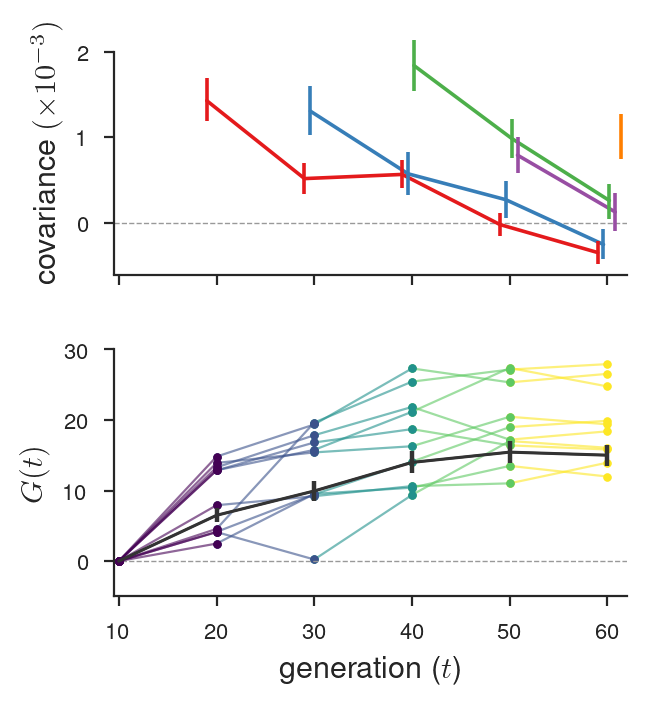

In [224]:
#plt.rc('text', usetex=False)
plt.rc('text', usetex=True)
plt.style.use('./buffalo.mplstyle')

fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(ONECOL*1.5, ONECOL*1.1))

cov_plot(barghi_gw_temp_covs_cis, ax=ax[0], ngens=10, xlim=(9.5, 62), y_multiplier=1000, linewidth=1.3)
G_plot(barghi_g, barghi_g_cis_averep, ax=ax[1], xlim=(9.5, 62), ylim=(-5, 30), linewidth=0.8, alpha=0.6, rep_markersize=2)


# customize plots
#ax[0].spines['bottom'].set_bounds(10, 60)
#ax[0].spines['bottom'].set_bounds(9.7, 60)
#ax[0].spines['left'].set_bounds(-0.6, 2)
#ax[0].spines['left'].set_bounds(0, 2)  # end top y axis at 0
# this drops top y axis below 0
#ax[1].spines['left'].set_position(('axes', -0.01))
# this combines the top y axis with the x axis
#ax[0].spines['left'].set_position(('axes', 0.01))
#ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
#ax[0].yaxis.set_major_formatter(mtick.LogFormatterMathtext())

#ax[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"${int(x)}\\%$"))

# uncomment if you don't want latex tick labels
ax[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{int(x)}%"))
# ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x}"))
ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{x}"))
ax[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f"{int(x)}"))

# ax[0].spines['bottom'].set_bounds(9.5, 60)
# ax[1].spines['bottom'].set_bounds(9.5, 60)
ax[0].spines['left'].set_bounds(-0.6, 2)
ax[1].spines['left'].set_bounds(-5, 30)
#ax[1].spines['left'].set_bounds(-3, 20)
#ax[1].spines['left'].set_bounds(0, 20)

plt.subplots_adjust(wspace=0.3, hspace=0.3, left=.4)
fig.savefig("figure-1-G-covs.pdf", bbox_inches='tight')

## Castro et al (2019)

In [129]:
castro_covs_cis = np.load("../../data/castro_et_al_2019/castro_et_al_2019_covs_bootstrap.npy")

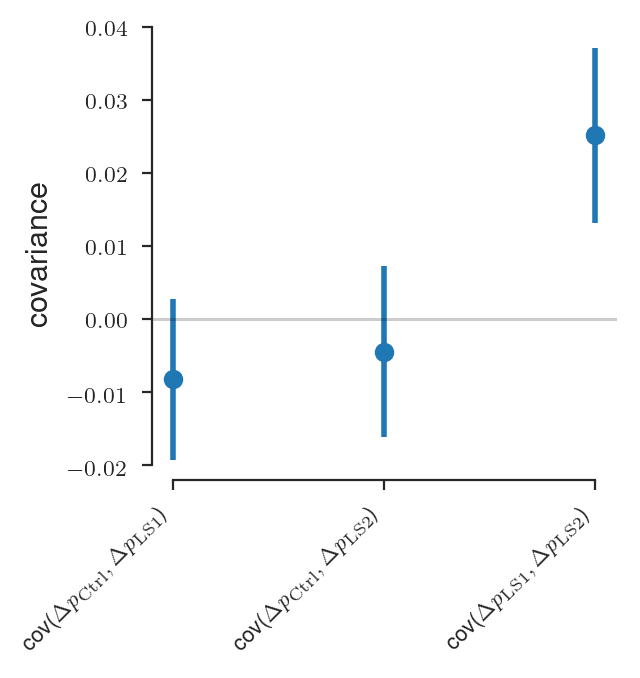

In [235]:
plt.style.use('buffalo.mplstyle')

mean = castro_covs_cis[1]
mpl.rcParams['figure.figsize'] = (3, 3)
#plt.figure(figsize=(5, 5))
lower, upper = castro_covs_cis[0]-mean, mean-castro_covs_cis[2]
comps = [('cov($\Delta p_\mathrm{Ctrl}, \Delta p_\mathrm{LS1}$)', 0, 1), ('cov($\Delta p_\mathrm{Ctrl}, \Delta p_\mathrm{LS2}$)', 0, 2), ('cov($\Delta p_\mathrm{LS1}, \Delta p_\mathrm{LS2}$)', 1, 2)]
means = [mean[r, c] for _, r, c in comps]
bounds = np.stack([(lower[r, c], upper[r, c]) for _, r, c in comps]).T
labels = [l for l, _, _ in comps]
  
ax = plt.subplot()    
ax.errorbar(labels, means, yerr=bounds, capsize=0, fmt='o', linewidth=2, elinewidth=2)
ax.axhline(y=0, c='k', alpha=0.2)

ax.spines['left'].set_bounds(-0.02, 0.04)
ax.spines['bottom'].set_bounds(0, 2)
plt.ylabel('covariance')
#plt.xlabel('comparison')
ax.set_xticklabels(labels, rotation = 45, ha="right")
plt.savefig('castro_rep_cis.pdf', bbox_inches="tight")

# for label in list(ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontsize(6)

## Kelly and Hughes (2019)

In [130]:
kh_covs_cis = np.load("../../data/kelly_hughes_2019/kelly_hughes_2019_covs_bootstrap.npy")

In [230]:
plt.style.use('buffalo.mplstyle')

mean = kh_covs_cis[1]
mpl.rcParams['figure.figsize'] = (3, 3)
#plt.figure(figsize=(5, 5))
lower, upper = kh_covs_cis[0]-mean, mean-kh_covs_cis[2]
comps = [('cov($\Delta p_\mathrm{A}, \Delta p_\mathrm{B}$)', 0, 1), ('cov($\Delta p_\mathrm{A}, \Delta p_\mathrm{C}$)', 0, 2), ('cov($\Delta p_\mathrm{B}, \Delta p_\mathrm{C}$)', 1, 2)]
means = [mean[r, c] for _, r, c in comps]
bounds = np.stack([(lower[r, c], upper[r, c]) for _, r, c in comps]).T
labels = [l for l, _, _ in comps]
  
ax = plt.subplot()    
ax.errorbar(labels, means, yerr=bounds, capsize=0, fmt='o', linewidth=2, elinewidth=2)
ax.axhline(y=0, c='k', alpha=0.2)

#ax.spines['left'].set_bounds(-0.02, 0.04)
ax.spines['bottom'].set_bounds(-0.1, 2)
ax.spines['left'].set_bounds(-0.0004, 0.008)
plt.ylabel('covariance')
#plt.xlabel('comparison')
ax.set_xticklabels(labels, rotation = 45, ha="right")
#plt.savefig('castro_rep_cis.pdf', bbox_inches="tight")
plt.savefig('kh_rep_cis.pdf', bbox_inches="tight")

# for label in list(ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontsize(6)

NameError: name 'kh_covs_cis' is not defined

## Empirical Null

In [44]:
barghi_emp_null = np.load('../../data/barghi_et_al_2019/empnull_tile.npy')
barghi_tile_covs = np.load('../../data/barghi_et_al_2019/tile_temporal_covs.npy')

In [58]:
barghi_tile_covs.shape

(1106, 6, 6, 10)

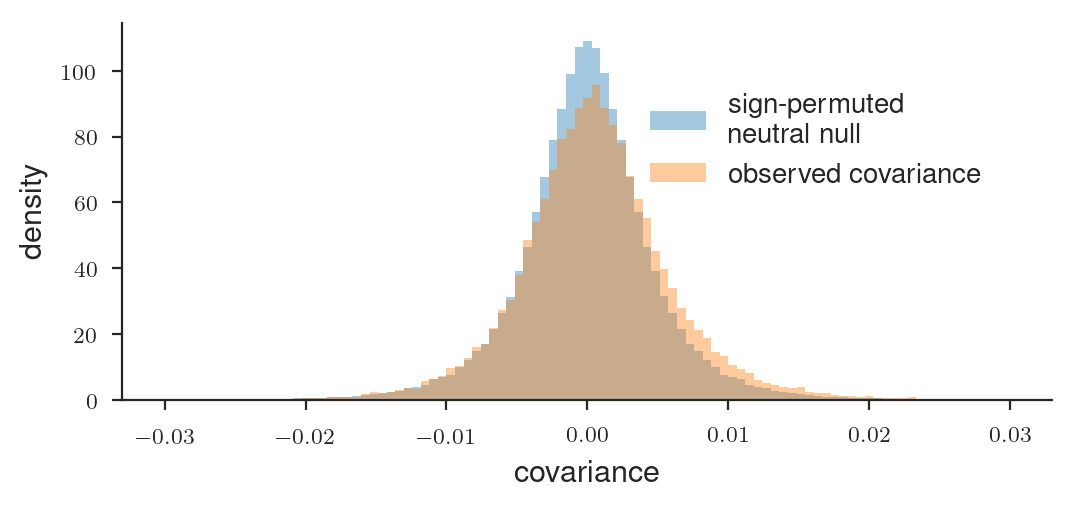

In [267]:
def cov_hist(empnull, real, rep=None, k=2, bins=np.linspace(-0.03, 0.03, 100), alpha=0.4,
             ax=None,
             empnull_label='sign-permuted\nneutral null', real_label='observed covariance',
             xlabel='covariance', ylabel='density'):
    assert(empnull.ndim == 5)
    rep = slice(None) if rep is None else rep
    # empnull is npermutations x nblocks x T x T x R
    # real is nblocks x T x T x R
    # after extracting diagonal, empnull_covs is npermutations x nblocks x R x U where U is elements
    # among diagonal k
    empnull_covs = np.diagonal(empnull, offset=k, axis1=2, axis2=3)[:, :, rep, :].ravel()
    real_covs = np.diagonal(real, offset=k, axis1=1, axis2=2)[:, rep, :].ravel()
    if ax is None:
        fig, ax = plt.subplots()
    ax.hist(empnull_covs, bins, alpha=alpha, density=True, label=empnull_label)
    ax.hist(real_covs, bins, alpha=alpha, density=True, label=real_label)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    return ax

cov_hist(barghi_emp_null, barghi_tile_covs, rep=None)

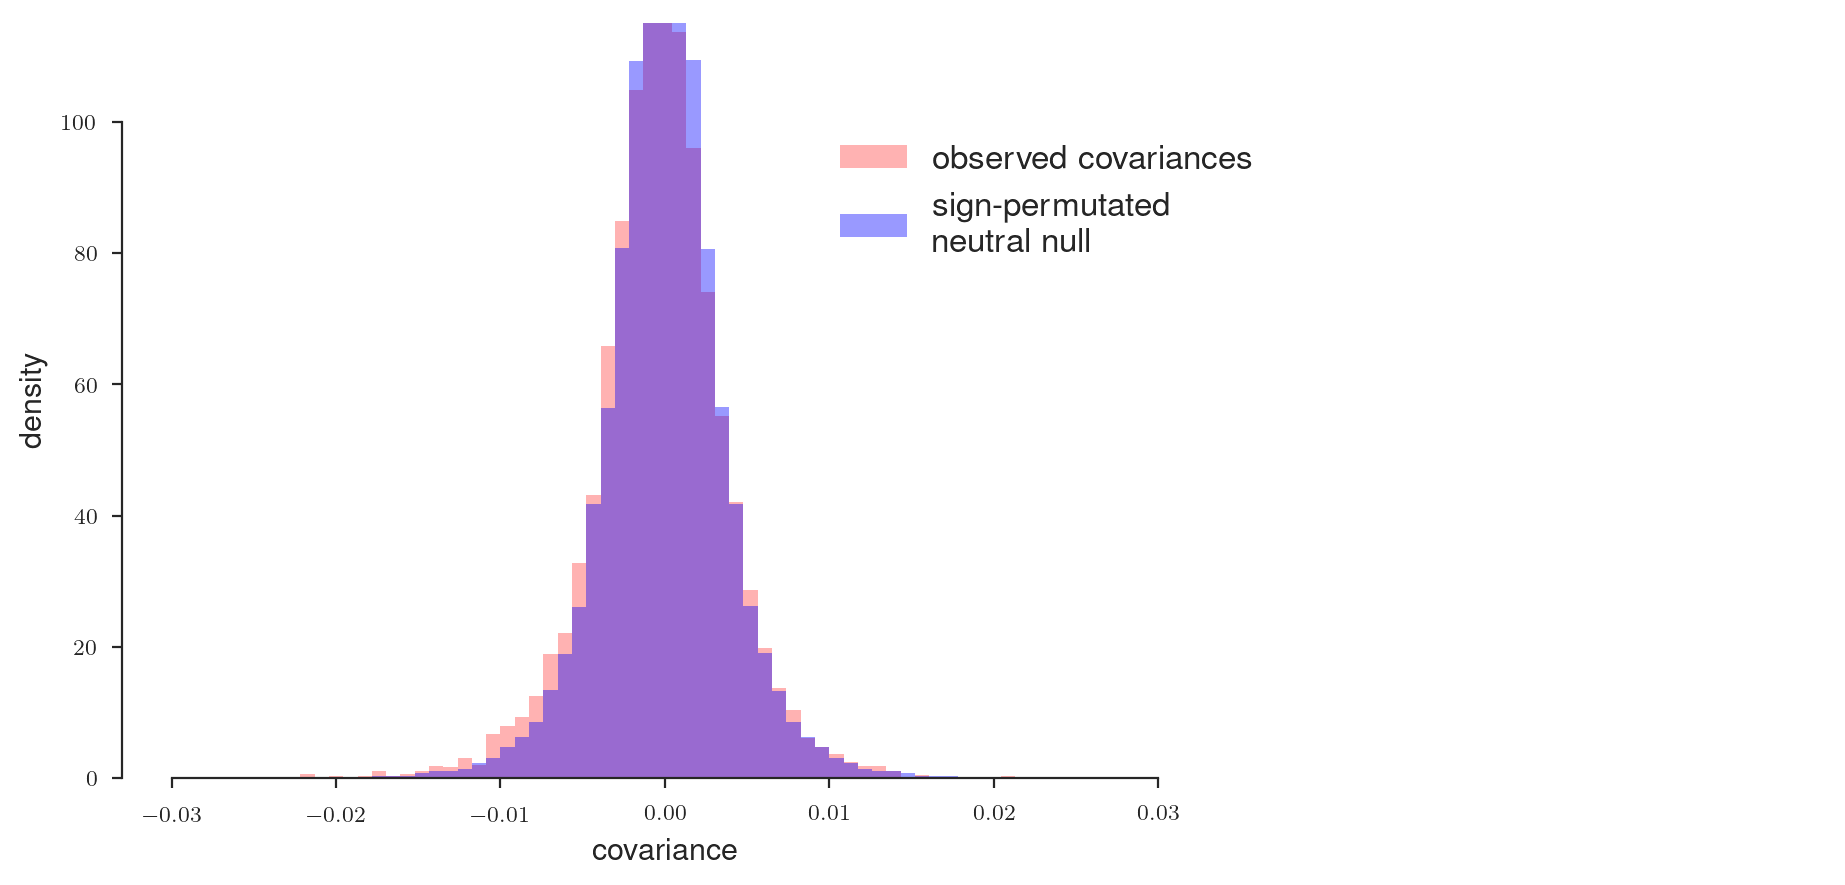

In [243]:
from cvtk.cov import stack_temporal_covariances

bins = np.linspace(-0.03, 0.03, 70)
covs = barghi_tile_covs
empcov_tile_stacked = barghi_emp_null
# empirical null
k = 5
empnull_k2 = list()
R, T = 10, 6
for row in range(0, T-k):
    empnull_k2.append(empcov_tile_stacked[:, :, row, row+k, :].ravel())
    
real_covs_diag_k2 = np.diagonal(covs, k, axis1=1, axis2=2).ravel()


fig, ax = plt.subplots(figsize=(7, 5))
#ax.hist(real_covs_diag_k2, bins, alpha=0.3, density=True, label='observed covariances\ncov($\Delta p_t, \Delta p_{t+%s}$)' % k, color=darj1[0])
ax.hist(real_covs_diag_k2, bins, alpha=0.3, density=True, label='observed covariances', color='r')

ax.hist(np.stack(empnull_k2).ravel(), bins, alpha=0.4, density=True, label='sign-permutated\nneutral null', color='b')
ax.spines['bottom'].set_bounds(-0.03, 0.03)
ax.spines['left'].set_bounds(0, 100)
plt.ylim(0, 115)
plt.ylabel('density')
plt.xlabel('covariance')
ax.legend(loc=(0.6, 0.6), mode='expand', fontsize=12)
plt.show()

# Old Stuff

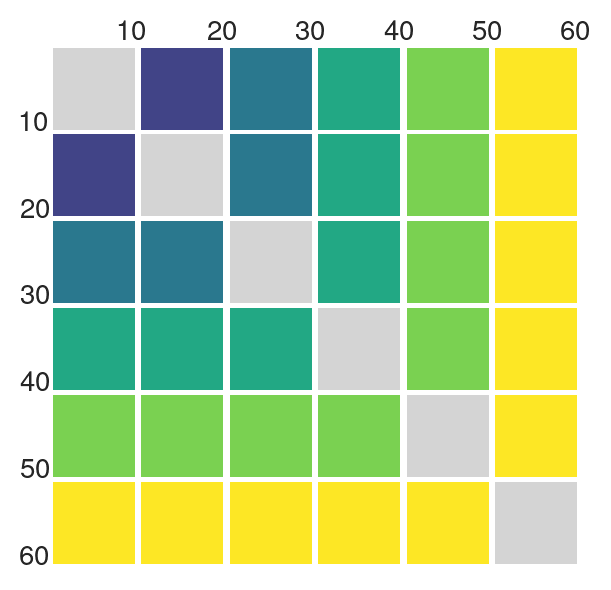

In [111]:
def make_grid(T):
    M = np.zeros((T, T))
    rows, cols = np.indices((T, T))
    for t in np.arange(T)[::-1]:
        M[(cols <= t) & (rows <= t)] = t
    np.fill_diagonal(M, np.nan)
    return M

#plt.imshow(make_grid(T))

# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(T, T)
# gs.update(wspace=0.01, hspace=0.04)

T = 6

fig, ax = plt.subplots(nrows=T, ncols=T, figsize=(ONECOL, ONECOL))
M = np.zeros((T, T))
rows, cols = np.indices((T, T))
bg_cols = cm.viridis(np.linspace(0, 1, T))

for t in np.arange(T)[::-1]:
    for r in np.arange(t):
        ax[r,t].set_facecolor(bg_cols[t])
        ax[t,r].set_facecolor(bg_cols[t])
    for r in np.arange(T):
        if r == t:
            ax[t,r].set_facecolor('44')
        ax[t, r].set_aspect('equal')
        ax[r, t].set_aspect('equal')
        
        ax[t, r].get_xaxis().set_visible(False)
        ax[r, t].get_xaxis().set_visible(False)
        ax[t, r].get_yaxis().set_visible(False)
        ax[t, r].get_yaxis().set_visible(False)
        
        ax[t, r].spines['top'].set_visible(False)
        ax[t, r].spines['right'].set_visible(False)
        ax[t, r].spines['left'].set_visible(False)
        ax[t, r].spines['bottom'].set_visible(False)
        if r == 0:
            ax[r, t].text(0.8, 1.1, (t+1)*10)
        if t == 0:
            ax[r, t].text(-0.4, 0, (r+1)*10)
plt.subplots_adjust(wspace=0.01, hspace=0.06)